<a href="https://colab.research.google.com/github/yprogbest/udemy_pandas/blob/main/pandasNote05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from scipy import stats

# 区間の集計

## サンプルデータの作成

,Norm,LogNorm
count,10000.000000,10000.000000
mean,-0.000636,1.662506
std,1.000014,2.115728
min,-4.238292,0.021694
25%,-0.678551,0.516889
50%,-0.008914,1.019281
75%,0.681980,1.989671
max,3.767457,48.062507


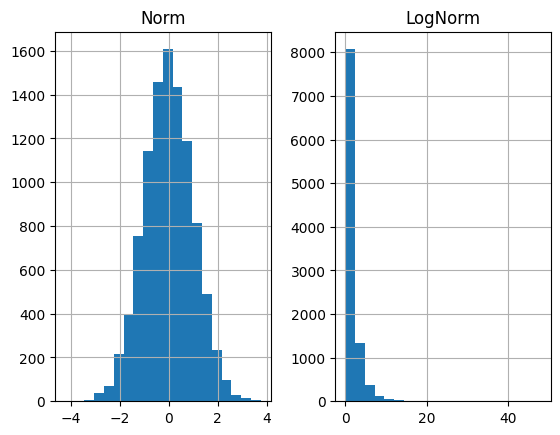

In [ ]:
df = pd.DataFrame()
df['Norm'] = stats.norm.rvs(loc=0, scale=1, size=10000) # 正規分布に沿った乱数
df['LogNorm'] = stats.lognorm.rvs(loc=0, s=1, size=10000) # 対数正規分布に沿った乱数
df.hist(bins=20)
df.describe()

## 区間毎のデータの個数を作成

In [ ]:
B = df['Norm'].value_counts(bins=20)
B

,count
"(-0.235, 0.165]",1607
"(-0.636, -0.235]",1457
"(0.165, 0.565]",1437
"(0.565, 0.965]",1189
"(-1.036, -0.636]",1144
"(0.965, 1.366]",816
"(-1.436, -1.036]",754
"(1.366, 1.766]",490
"(-1.837, -1.436]",393
"(1.766, 2.166]",234


### SeriesオブジェクトBをインデックスの順に整列

In [ ]:
B.sort_index(inplace=True)
B

,count
"(-4.247000000000001, -3.838]",3
"(-3.838, -3.438]",1
"(-3.438, -3.037]",7
"(-3.037, -2.637]",38
"(-2.637, -2.237]",70
"(-2.237, -1.837]",214
"(-1.837, -1.436]",393
"(-1.436, -1.036]",754
"(-1.036, -0.636]",1144
"(-0.636, -0.235]",1457


In [ ]:
B.index[0] #出力結果：Interval(-4.126, -3.73, closed='right')　closed='right' -> -3.73を含む（-4.126は含まない）

Interval(-4.247000000000001, -3.838, closed='right')

In [ ]:
B.max() # 最頻値

1607

## Intervalオブジェクト

In [ ]:
iv = pd.Interval(1, 2, closed='neither')
iv

Interval(1, 2, closed='neither')

In [ ]:
print(iv)

(1, 2)


### 注意）上のオブジェクトはタプルではない。　1と2を含まない、という意味

In [ ]:
1.5 in iv

True

In [ ]:
2 in iv

False

In [ ]:
3 in iv

False

# データの可視化

## matplotlibによる作図処理

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
x = np.arange(-2, 2, 0.05)
x

array([-2.00000000e+00, -1.95000000e+00, -1.90000000e+00, -1.85000000e+00,
       -1.80000000e+00, -1.75000000e+00, -1.70000000e+00, -1.65000000e+00,
       -1.60000000e+00, -1.55000000e+00, -1.50000000e+00, -1.45000000e+00,
       -1.40000000e+00, -1.35000000e+00, -1.30000000e+00, -1.25000000e+00,
       -1.20000000e+00, -1.15000000e+00, -1.10000000e+00, -1.05000000e+00,
       -1.00000000e+00, -9.50000000e-01, -9.00000000e-01, -8.50000000e-01,
       -8.00000000e-01, -7.50000000e-01, -7.00000000e-01, -6.50000000e-01,
       -6.00000000e-01, -5.50000000e-01, -5.00000000e-01, -4.50000000e-01,
       -4.00000000e-01, -3.50000000e-01, -3.00000000e-01, -2.50000000e-01,
       -2.00000000e-01, -1.50000000e-01, -1.00000000e-01, -5.00000000e-02,
        1.77635684e-15,  5.00000000e-02,  1.00000000e-01,  1.50000000e-01,
        2.00000000e-01,  2.50000000e-01,  3.00000000e-01,  3.50000000e-01,
        4.00000000e-01,  4.50000000e-01,  5.00000000e-01,  5.50000000e-01,
        6.00000000e-01,  

In [ ]:
y = x**2
y

array([4.00000000e+00, 3.80250000e+00, 3.61000000e+00, 3.42250000e+00,
       3.24000000e+00, 3.06250000e+00, 2.89000000e+00, 2.72250000e+00,
       2.56000000e+00, 2.40250000e+00, 2.25000000e+00, 2.10250000e+00,
       1.96000000e+00, 1.82250000e+00, 1.69000000e+00, 1.56250000e+00,
       1.44000000e+00, 1.32250000e+00, 1.21000000e+00, 1.10250000e+00,
       1.00000000e+00, 9.02500000e-01, 8.10000000e-01, 7.22500000e-01,
       6.40000000e-01, 5.62500000e-01, 4.90000000e-01, 4.22500000e-01,
       3.60000000e-01, 3.02500000e-01, 2.50000000e-01, 2.02500000e-01,
       1.60000000e-01, 1.22500000e-01, 9.00000000e-02, 6.25000000e-02,
       4.00000000e-02, 2.25000000e-02, 1.00000000e-02, 2.50000000e-03,
       3.15544362e-30, 2.50000000e-03, 1.00000000e-02, 2.25000000e-02,
       4.00000000e-02, 6.25000000e-02, 9.00000000e-02, 1.22500000e-01,
       1.60000000e-01, 2.02500000e-01, 2.50000000e-01, 3.02500000e-01,
       3.60000000e-01, 4.22500000e-01, 4.90000000e-01, 5.62500000e-01,
      

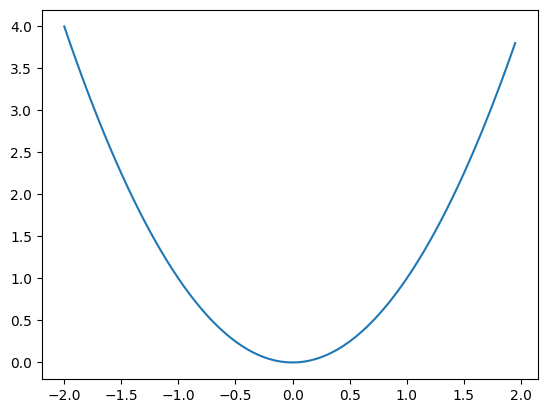

In [ ]:
plt.plot(x, y)
plt.show()

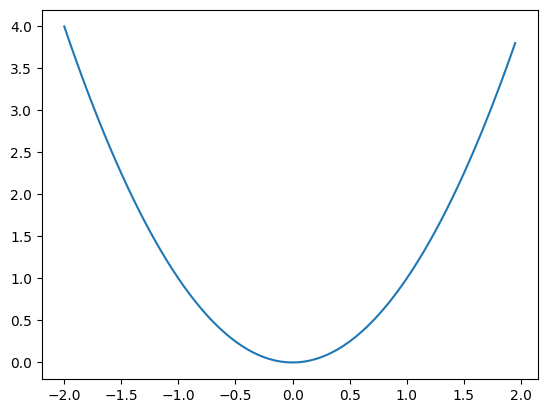

In [ ]:
# より正しい手順
plt.figure()
plt.plot(x, y)
dname = r'/content/drive/MyDrive/Colab Notebooks/'
fname = r'graph.png'
plt.savefig(dname + fname)
plt.show()

## Pandasへの応用

In [ ]:
fname2 = dname + r'graph02.png'
fname2

'/content/drive/MyDrive/Colab Notebooks/graph02.png'

<Figure size 640x480 with 0 Axes>

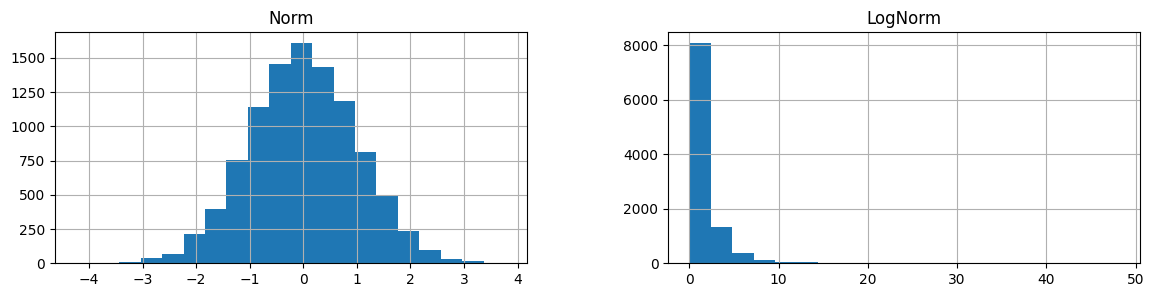

In [ ]:
plt.figure()
df.hist(bins=20, figsize=(14,3))
plt.savefig(fname2)
plt.show()

### グラフを重ねてプロットする方法

In [ ]:
fname3 = dname + r'graph03.png'
fname3

'/content/drive/MyDrive/Colab Notebooks/graph03.png'

### 日本語フォントを使用するための準備

In [ ]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 30.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=dca286b8930809b7e27bea5216982bc05be484cb95f0a7856b6558a54d2107d2
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


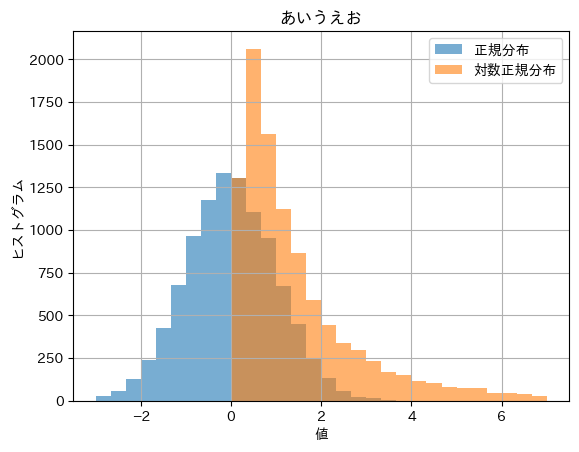

In [ ]:
import japanize_matplotlib

plt.figure()
df['Norm'].hist(bins=30, alpha=0.6, range=(-3, 7), label='正規分布')
df['LogNorm'].hist(bins=30, alpha=0.6, range=(-3, 7), label='対数正規分布')
plt.xlabel('値')
plt.ylabel('ヒストグラム')
plt.title('あいうえお')
plt.legend()
plt.savefig(fname3)
plt.show()

## 箱ひげ図

,Norm
count,10000.000000
mean,-0.000636
std,1.000014
min,-4.238292
25%,-0.678551
50%,-0.008914
75%,0.681980
max,3.767457


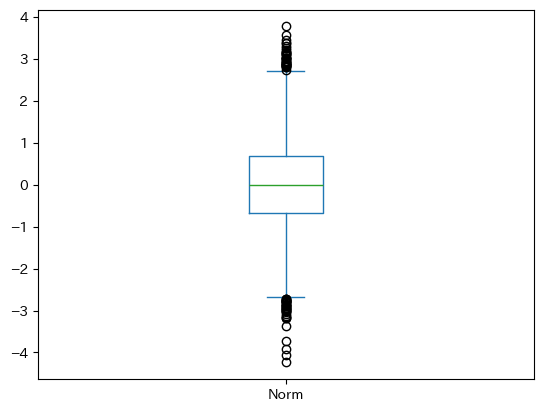

In [ ]:
df['Norm'].plot(kind='box')
df['Norm'].describe()

<Axes: >

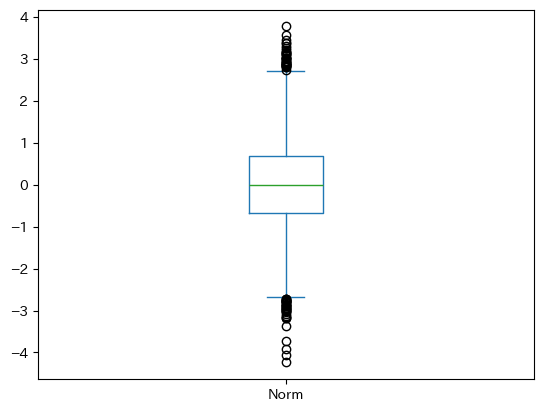

In [ ]:
df['Norm'].plot.box()

<Axes: >

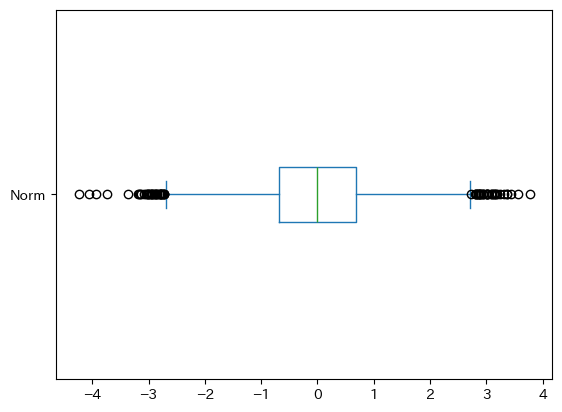

In [ ]:
df['Norm'].plot.box(vert=False)

<Axes: >

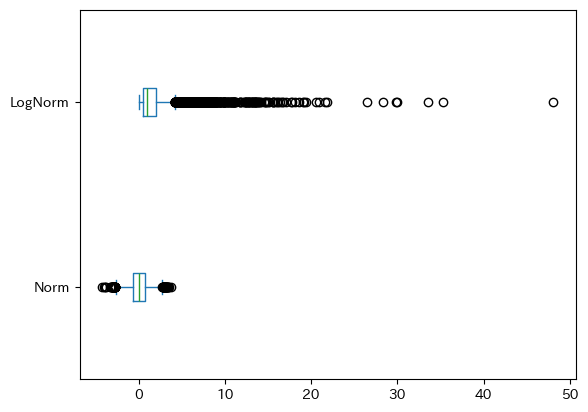

In [ ]:
df.plot.box(vert=False)

<Axes: >

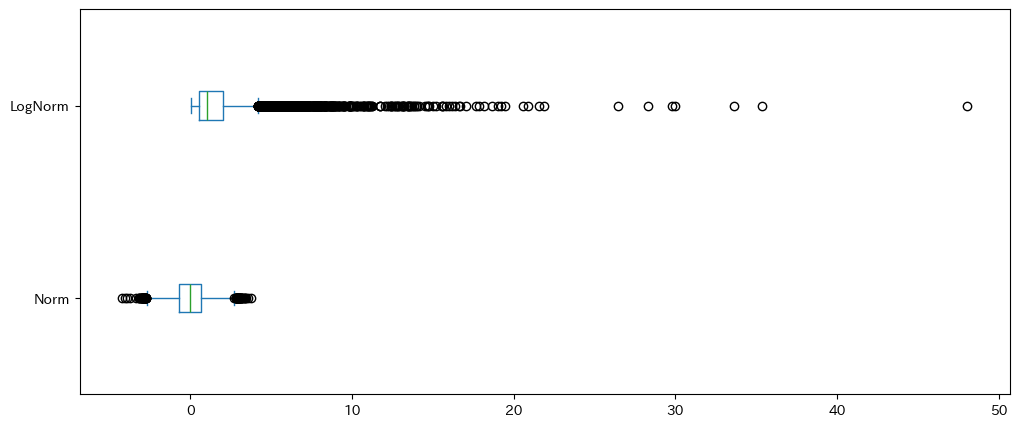

In [ ]:
df.plot.box(vert=False, figsize=(12,5))